* This is my practice version based on a mix of my enrolled bootcamp programs.
* LinkedIn: https://www.linkedin.com/in/binh-nguyen-797319248/
* Email: binhnguyen.ibm@gmail.com

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset used in this notebook

UFO_report = pd.read_csv('data/nuforc_reports.csv')

## **7. Working with Date and Times**

### 7.1. `pd.to_datetime`

#### Overview
In some previous notebooks, we have `pd.to_numeric` that convert an input into numeric values. Here, `pd.to_datetime` converts the inputs into date and time data. Beside the parameter `errors =`, some of noteworthy arguments are:
1. `dayfirst =  True/False`: this helps Pandas understand the input better, particular specifying that the input is in the structure beginning with day values. E.g. '05-05-2020'.
2. `yearfist = True/False`: specifying that the input is in the structure beginning with year values. E.g. '2019-12-32'.
3. `format = `: specifying the input structure, facilitating the understanding of Pandas.

**It is important to have the correct datetime format in many cases such as comparison operators between dates and times; numeric computations; filtering data by dates and times etc.**

In [7]:
# First let's have a look at how 'smart' Pandas is without specifying any arguments

print(pd.to_datetime('31/12/2022'))
print(pd.to_datetime('31-12-2022'))
print(pd.to_datetime('31.12.2022'))
print(pd.to_datetime('12/31/2022'))
print(pd.to_datetime('2022.12.31'))
print(pd.to_datetime('31st Dec. 22'))
print(pd.to_datetime('22 December 31'))
print(pd.to_datetime('12-31-2022 23:59'))
print(pd.to_datetime('31.12.22 12:59pm'))
print(pd.to_datetime('22 31st Dec 12:59:32'))
print(pd.to_datetime('12:59pm 31st Dec 22'))

2022-12-31 00:00:00
2022-12-31 00:00:00
2022-12-31 00:00:00
2022-12-31 00:00:00
2022-12-31 00:00:00
2022-12-31 00:00:00
2031-12-22 00:00:00
2022-12-31 23:59:00
2022-12-31 12:59:00
2022-12-31 12:59:32
2022-12-31 12:59:00


* We can see how smart Pandas is. The only issue is the case of '22 December 31' because it is relatively ambiguous, whether '22' or '31' is the day/year. In such case, we may need to add helper parameters to clarify.

In [9]:
pd.to_datetime('97 December 31')

Timestamp('1997-12-31 00:00:00')

* The output data is stored as Timestamp data, which have its own specialized methods.
* Also note that, this example is similar to the ambiguous case above of '22 December 31'. However, as this time we have the value '97' then Pandas can work it out clearly.

**Arguments for the parameters `format` (for ambiguous cases e.g. '10/11/12')**:
* `%a`: abbreviated weekday Sun, Mon, Tue, Wed, Thu, Fri, Sat.
* `%A`: weekday full name, e.g. Sunday, Monday...
* `%d`: Day of the month as a zero-padded decimal number, e.g. 01, 02, 03, ... 31.
* `%b`: abbreviated month name, e.g. Jan, Feb, ...
* `%B`: full month name, e.g. January, ... December.
* `%m`: month as a zero-padded decimal number, e.g. 01, 02, ..., 12.
* `%y`: year without century as a zero-padded decimal number, e.g. 98, 98, 99, ..., 23, 24, 25...
* `%Y`: year with century as a decimal number, e.g. ... 1898, 1899, ..., 1997, 1998, ..., 2023, 2024, 2025, ...

For detail information, have a look at: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [12]:
# example 

print('The following input is ambiguous: ')
print(pd.to_datetime('22 December 31'))    # the year is 2022

print('We can clarify this: ')
print(pd.to_datetime('22 December 31', format = '%y %B %d'))

# Note that we need to specify the argument for 'format' as in the input, including the separators

The following input is ambiguous: 
2031-12-22 00:00:00
We can clarify this: 
2022-12-31 00:00:00


#### Apply to a dataset

In [14]:
UFO_report.head(2)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300


In [15]:
UFO_report['date_time'] = pd.to_datetime(UFO_report['date_time'])

UFO_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


In [16]:
UFO_report.head(2)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300


In [17]:
# We can also convert the datetime column into the correct format when importing the data
# This is done with the parameter parse_dates

pd.read_csv('data/nuforc_reports.csv', parse_dates = ['date_time', 'posted']).head(2)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300


### 7.2. Methods for `.dt`

In [19]:
UFO_report.date_time

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88120   2019-10-02 20:00:00
88121   2019-10-02 20:00:00
88122   2019-10-02 20:03:00
88123   2019-10-02 22:00:00
88124   2019-10-02 22:00:00
Name: date_time, Length: 88125, dtype: datetime64[ns]

* Just as other datatype such as string, the datetime data have their specilized methods.
* As for string with the syntax `.str.`, here we use `.dt.`

In [21]:
# Example 1: extracting the year

UFO_report.date_time.dt.year

0        2019.0
1        2019.0
2           NaN
3        2019.0
4        2009.0
          ...  
88120    2019.0
88121    2019.0
88122    2019.0
88123    2019.0
88124    2019.0
Name: date_time, Length: 88125, dtype: float64

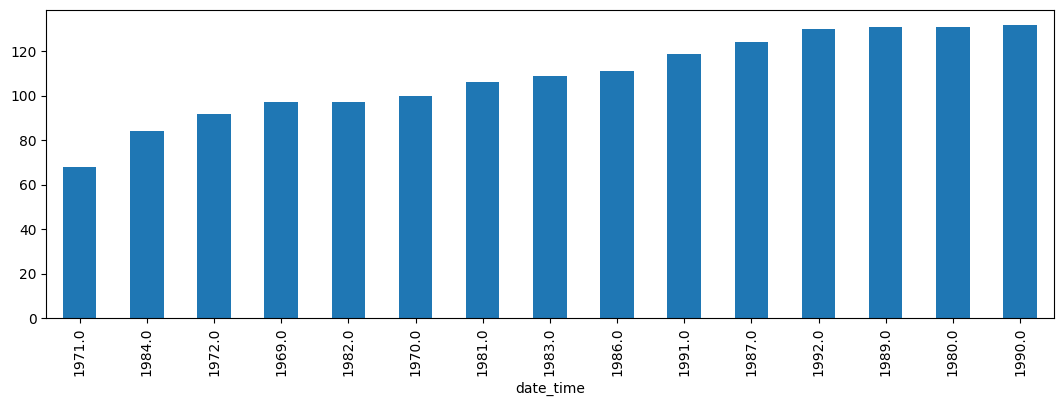

In [22]:
# an application with methods we have discussed

(
    UFO_report.date_time
    .dt.year
    .value_counts()
    .sort_values()
    .head(15)
    .plot(kind = 'bar', figsize = (13, 4))
);
# extract the year, then count their frequency, then sort the values, then select the top 15, and plot as a bar chart

# we will have different notebooks for plots in detail

In [23]:
# Similarly

UFO_report.date_time.dt.month

0        12.0
1         3.0
2         NaN
3         4.0
4         3.0
         ... 
88120    10.0
88121    10.0
88122    10.0
88123    10.0
88124    10.0
Name: date_time, Length: 88125, dtype: float64

In [24]:
# Suppose that we don't want to see the hours data

UFO_report.date_time.dt.date

0        2019-12-12
1        2019-03-22
2               NaT
3        2019-04-17
4        2009-03-15
            ...    
88120    2019-10-02
88121    2019-10-02
88122    2019-10-02
88123    2019-10-02
88124    2019-10-02
Name: date_time, Length: 88125, dtype: object

### 7.3. Filtering data based on datetime

In [26]:
# example 1

UFO_report[UFO_report.date_time >= '2019'] # filtering rows after 2019

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
5,"The object has flashing lights that are green,...",Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
6,Description is the same as Washington DC event...,Tucson,AZ,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [27]:
# example 2

UFO_report[UFO_report.date_time.between('2019-08-01', '2019-11-30')] # filtering data from Aug 2019 to Nov 2019

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
16,There were 4 lights in diagonal formation that...,Yuba City,CA,2019-08-17 00:00:00,formation,20 minutes,Occurred : 8/17/2019 00:00 (Entered as : 0817...,http://www.nuforc.org/webreports/148/S148345.html,There were 4 lights in diagonal formation that...,2019-08-23T00:00:00,39.059811,-121.668256
17,Star-like light that started bouncing in the a...,Abilene,TX,2019-08-14 01:00:00,light,30 seconds,Occurred : 8/14/2019 01:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/148/S148373.html,star-like light that started bouncing in the a...,2019-08-23T00:00:00,32.394351,-99.790044
18,There where 4 bright lights in a shape of a di...,Leyner,CO,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,NaN,NaN
19,My wife and I were taking our usual evening st...,Catalina,AZ,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,NaN,NaN
20,Abnormal flashing object in SoCal,Santa Barbara,CA,2019-08-06 20:45:00,flash,5 minutes,Occurred : 8/6/2019 20:45 (Entered as : 08/06...,http://www.nuforc.org/webreports/148/S148122.html,Abnormal flashing object in SoCal As an avid s...,2019-08-23T00:00:00,34.317038,-119.720541
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [28]:
# example 3

UFO_report[UFO_report.date_time.dt.month == 12] # filtering only data in December

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
65,big blue fireball very low,Oxnard,CA,1971-12-25 08:00:00,sphere,2 seconds,Occurred : 12/25/1971 08:00 (Entered as : 12/...,http://www.nuforc.org/webreports/050/S50053.html,big blue fireball very low I was walking with ...,2006-05-15T00:00:00,34.194501,-119.163161
115,Silver-grey balloon clusters at very high alti...,Monterey Bay Area,CA,1985-12-01 14:00:00,formation,10 to 30minutes,Occurred : 12/1/1985 14:00 (Entered as : 12/0...,http://www.nuforc.org/webreports/050/S50567.html,Silver-grey balloon clusters at very high alti...,2006-05-15T00:00:00,NaN,NaN
154,"Enormous UFO Arlington, Texas",Arlington,TX,1993-12-01 14:00:00,oval,5 to 10 minutes,Occurred : 12/1/1993 14:00 (Entered as : 12/1...,http://www.nuforc.org/webreports/050/S50228.html,"Enormous UFO Arlington, Texas Although I have ...",2006-05-15T00:00:00,32.707097,-97.123871
189,"The appearance of a tiny saucer, the size of a...",Bassano del Grappa (Italy),NaN,2018-12-05 03:00:00,disk,2-3 minutes,Occurred : 12/5/2018 03:00 (Entered as : 12/0...,http://www.nuforc.org/webreports/145/S145190.html,"The appearance of a tiny saucer, the size of a...",2019-03-21T00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87907,Exploding hovering fire ball (have video and p...,Waynesboro,MS,2019-12-18 21:00:00,fireball,10 minutes,Occurred : 12/18/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151730.html,Exploding hovering fire ball (have video and p...,2019-12-19T00:00:00,31.686500,-88.684500
87908,Exploding hovering fire ball (have video and p...,Waynesboro,MS,2019-12-18 21:00:00,fireball,10 minutes,Occurred : 12/18/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151729.html,Exploding hovering fire ball (have video and p...,2019-12-19T00:00:00,31.686500,-88.684500
87924,I saw what looked like a person standing by a ...,Woolwich,ME,2019-12-01 00:30:00,other,20 minutes,Occurred : 12/1/2019 00:30 (Entered as : 12/1...,http://www.nuforc.org/webreports/151/S151195.html,As I was driving home from working in Bath wit...,2019-12-01T00:00:00,43.956500,-69.765300
87925,Many lights fly in line across the sky. ((NUF...,Næstved (Denmark),NaN,2019-12-01 06:35:00,light,5-10 minutess,Occurred : 12/1/2019 06:35 (Entered as : 12/1...,http://www.nuforc.org/webreports/151/S151197.html,Many lights fly in line across the sky I was o...,2019-12-01T00:00:00,NaN,NaN


In [29]:
# example 4: combine with AND/OR

(
    UFO_report[
    (UFO_report.date_time.between('2010', '2012')) & 
    ( (UFO_report.date_time.dt.month == 6) | (UFO_report.date_time.dt.month == 9) )
    ]
)

# Filtering data in June or September during 2010-2012

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
787,Circle bright what light 3 minutes.,Oneida,TN,2011-06-23 00:20:00,circle,3 minutes,Occurred : 6/23/2011 00:20 (Entered as : 06/2...,http://www.nuforc.org/webreports/148/S148337.html,Circle bright what light 3 minutes The ufo I ...,2019-08-23T00:00:00,36.510100,-84.469300
22244,"Bright light, too low to be a satellite, hover...",Groton,CT,2010-06-01 04:00:00,light,15 minutes,Occurred : 6/1/2010 04:00 (Entered as : 06/02...,http://www.nuforc.org/webreports/075/S75771.html,"Bright light, too low to be a satellite, hover...",2010-06-23T00:00:00,41.354620,-72.040182
22245,"I was giving my son,18, a ride in my new truck...",Federal Way,WA,2010-06-02 17:54:00,disk,UNKNOWN,Occurred : 6/2/2010 17:54 (Entered as : 06/02...,http://www.nuforc.org/webreports/075/S75773.html,"I was giving my son, 18, a ride in my new truc...",2010-06-23T00:00:00,47.306537,-122.342901
22246,"Two orange objects, side by side moving south ...",Topeka,KS,2010-06-05 01:00:00,rectangle,35-45 seconds,Occurred : 6/5/2010 01:00 (Entered as : 6/510...,http://www.nuforc.org/webreports/075/S75851.html,"Two orange objects, side by side moving south ...",2010-06-23T00:00:00,39.033869,-95.757230
22247,Two orange lights traveling over Topeka. They ...,Topeka,KS,2010-06-05 01:00:00,NaN,NaN,Occurred : 6/5/2010 01:00 Reported: 6/12/2010 ...,http://www.nuforc.org/webreports/075/S75756.html,Two orange lights traveling over Topeka. They...,2010-06-23T00:00:00,39.033869,-95.757230
...,...,...,...,...,...,...,...,...,...,...,...,...
82706,Woke up to find a spherical black metallic bea...,Landers,CA,2011-06-11 02:00:00,sphere,5 minutes,Occurred : 6/11/2011 02:00 (Entered as : 06/1...,http://www.nuforc.org/webreports/142/S142634.html,Woke up to find a spherical black metallic bea...,2018-08-10T00:00:00,34.300300,-116.455150
83665,2 lights moving south spin around each other a...,Tallahassee,FL,2011-09-25 02:15:00,sphere,3 minutes,Occurred : 9/25/2011 02:15 (Entered as : 09/2...,http://www.nuforc.org/webreports/142/S142039.html,2 lights moving south spin around each other a...,2018-07-05T00:00:00,30.474393,-84.255290
83991,"Good afternoon, just wanted to share an experi...",Naylor,GA,2010-09-12 22:30:00,triangle,4 minutes,Occurred : 9/12/2010 22:30 (Entered as : 09/1...,http://www.nuforc.org/webreports/148/S148970.html,"Good afternoon, just wanted to share an experi...",2019-09-19T00:00:00,30.928200,-83.103400
85804,Disturbing rumbling followed by loud whistling...,Byron,IL,2010-06-15 02:30:00,disk,2 minutes,Occurred : 6/15/2010 02:30 (Entered as : 6/15...,http://www.nuforc.org/webreports/150/S150338.html,Disturbing rumbling followed by loud whistling...,2019-12-01T00:00:00,42.162500,-89.247700


### 7.4. Computations with datetime

In [31]:
UFO_report['posted'] = pd.to_datetime(UFO_report['posted'])

In [32]:
UFO_report.head(2)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300


In [33]:
# Suppose that the column date_time is the observation time, while posted is the time the event is posted

# example 1
UFO_report.posted - UFO_report.date_time

0          9 days 05:17:00
1          6 days 05:30:00
2                      NaT
3          0 days 22:00:00
4       3685 days 06:00:00
               ...        
88120      1 days 04:00:00
88121      1 days 04:00:00
88122      1 days 03:57:00
88123      1 days 02:00:00
88124      1 days 02:00:00
Length: 88125, dtype: timedelta64[ns]

* We can see that data type is `timedelta64[ns]`. It basically represents a span of time.

In [35]:
# example 2: what is the average time from the observation time to the report time ?

(UFO_report.posted - UFO_report.date_time).mean()

Timedelta('591 days 18:20:54.061285056')

In [36]:
# example 3: what are the top 10 longest span (in YEARS) from the observation time to the report time ?

(
    (((UFO_report.posted - UFO_report.date_time)
    .dt.days)                           # this converts into the number of days
    / 365)                              # suppose that 1 year = 365 days, this converts into the number of years
    .sort_values(ascending = False)
    .head(10)
)

86762    50.583562
87145    50.282192
721      50.175342
1576     50.101370
1580     49.972603
84984    49.586301
83965    49.213699
722      49.180822
723      49.052055
1301     48.967123
dtype: float64